### Importing Packages

#### This code snippet below auto-generates a requirements.txt file for the project. You do not need to run this snippet, which is why it is commented out. 

In [6]:
#!pip freeze > requirements.txt

In [1]:
import os
import ast
import json
import pandas as pd
import spotipy
import spotipy.util as util
import pytz
import datetime
from datetime import datetime
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from stop_words import get_stop_words
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob.classifiers import NaiveBayesClassifier as NBC
from sklearn import svm 
import nltk.corpus
from nltk.corpus import stopwords
import numpy as np
from sklearn import datasets
from scipy.stats import kstest
import lyricsgenius
from lyricsgenius import Genius

### Class Predictions:
#### The class is where I completed alot of model compilation for predictions about what the top genre would be for a song given parameters such as bpm, dnce, live, val

In [4]:
class Predictions:
    def __init__(self):
        """
        Initializes a Predictions class object.
        
        Parameters
        ----------
        None
        
        """
        self.merged_df = pd.read_pickle("mergedDF.pkl")

    def svm(self):
        merged_df = self.merged_df
        WorkingDataSet = merged_df[['Categories','year','top genre','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']]
        WorkingDataSet = WorkingDataSet.drop_duplicates()
        WorkingDataSet = WorkingDataSet.reset_index(drop=True)
        
        le = LabelEncoder()
        top_genre_uniques = WorkingDataSet['top genre'].unique()
        encoded_top_genre = le.fit_transform(top_genre_uniques)
        label_map = {label: encoded_top_genre for label, encoded_top_genre in zip(top_genre_uniques, encoded_top_genre)}
        print(label_map)
        WorkingDataSet['top genre'] = le.fit_transform(WorkingDataSet['top genre'])

        corr_matrix = WorkingDataSet.corr()
        corr_matrix
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

        # Assuming your DataFrame is called df and you want to split based on a target column 'target_column'
        X = WorkingDataSet.drop(['top genre','year','Categories'], axis=1)
        y = WorkingDataSet['top genre']
        
        # Split the data into training (70%) and temporary data (20%)
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Split the temporary data into validation (50%) and test (50%) sets
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

        svm_model = SVC(kernel = 'rbf', decision_function_shape = 'ovr',random_state=42) #rbf - Gaussian Curve (tried sigmoid)
        svm_model.fit(X_train, y_train)
        
        y_val_pred = svm_model.predict(X_val)
        val_accuracy = accuracy_score(y_val,y_val_pred)
        print(f"Validation Accuracy: {val_accuracy:.2f}")
        
        y_test_pred = svm_model.predict(X_test)
        test_accuracy = accuracy_score(y_test,y_test_pred)
        print(f"Test Accuracy: {test_accuracy:.2f}")

    def logisticregression(self):
        merged_df = self.merged_df
        WorkingDataSet = merged_df[['Categories','year','top genre','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']]
        WorkingDataSet = WorkingDataSet.drop_duplicates()
        WorkingDataSet = WorkingDataSet.reset_index(drop=True)
        
        le = LabelEncoder()
        top_genre_uniques = WorkingDataSet['top genre'].unique()
        encoded_top_genre = le.fit_transform(top_genre_uniques)
        label_map = {label: encoded_top_genre for label, encoded_top_genre in zip(top_genre_uniques, encoded_top_genre)}
        print(label_map)
        WorkingDataSet['top genre'] = le.fit_transform(WorkingDataSet['top genre'])

        corr_matrix = WorkingDataSet.corr()
        corr_matrix
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

        # Assuming your DataFrame is called df and you want to split based on a target column 'target_column'
        X = WorkingDataSet.drop(['top genre','year','Categories'], axis=1)
        y = WorkingDataSet['top genre']
        
        # Split the data into training (70%) and temporary data (20%)
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Split the temporary data into validation (50%) and test (50%) sets
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


        X_train_log = np.array(X_train)
        X_val_log = np.array(X_val)
        X_test_log = np.array(X_test)
        y_train_log = np.array(y_train)
        y_val_log = np.array(y_val)
        y_test_log = np.array(y_test)

        model = LogisticRegression(max_iter=1000)
        
        model.fit(X_train_log,y_train_log)
        
        predictions = model.predict(X_test)
        
        accuracy = model.score(X_test, y_test)
        print(f"Accuracy: {accuracy}")
        
        print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(model.score(X_train, y_train)))
        print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))
        
        X_test_log[:1,:]
        
        WholeTestPrediction = model.predict_proba(X_test_log)
        
        TestPrediction = model.predict_proba(X_test_log[:1,:])
        
        ix = TestPrediction.argmax(1).item()
        
        print(ix) #HipHop
        
        print(WholeTestPrediction[0,ix]) #Percentage
    

In [5]:
Future = Predictions()

{'hip hop': 44, 'atl hip hop': 5, 'chicago rap': 22, 'boston hip hop': 12, 'memphis hip hop': 51, 'melodic rap': 50, 'chicago drill': 21, 'electro house': 36, 'cali rap': 16, 'canadian hip hop': 18, 'r&b': 64, 'dance pop': 27, 'pop r&b': 61, 'kentucky hip hop': 48, 'contemporary r&b': 26, 'east coast hip hop': 35, 'nyc rap': 55, 'brooklyn drill': 14, 'deep underground hip hop': 29, 'pop': 60, 'pop rap': 62, 'barbadian pop': 8, 'pluggnb': 59, 'dirty south rap': 33, 'conscious hip hop': 25, 'detroit hip hop': 30, 'florida rap': 39, 'dfw rap': 32, 'florida drill': 38, 'rap': 65, 'hip pop': 45, 'canadian pop': 19, 'chicago bop': 20, 'indie pop rap': 47, 'new jersey rap': 53, 'atl trap': 6, 'dutch house': 34, 'big room': 10, 'afrobeats': 0, 'comedy rap': 24, 'north carolina hip hop': 54, 'bronx hip hop': 13, 'gangster rap': 42, 'reggaeton': 66, 'brostep': 15, 'detroit trap': 31, 'dancehall': 28, 'grime': 43, 'arkansas hip hop': 4, 'ohio hip hop': 57, 'houston rap': 46, 'baton rouge rap': 9,

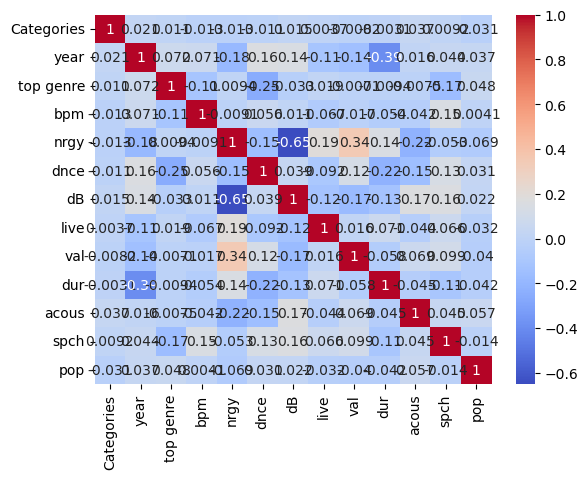

In [6]:
Future.svm()

{'hip hop': 44, 'atl hip hop': 5, 'chicago rap': 22, 'boston hip hop': 12, 'memphis hip hop': 51, 'melodic rap': 50, 'chicago drill': 21, 'electro house': 36, 'cali rap': 16, 'canadian hip hop': 18, 'r&b': 64, 'dance pop': 27, 'pop r&b': 61, 'kentucky hip hop': 48, 'contemporary r&b': 26, 'east coast hip hop': 35, 'nyc rap': 55, 'brooklyn drill': 14, 'deep underground hip hop': 29, 'pop': 60, 'pop rap': 62, 'barbadian pop': 8, 'pluggnb': 59, 'dirty south rap': 33, 'conscious hip hop': 25, 'detroit hip hop': 30, 'florida rap': 39, 'dfw rap': 32, 'florida drill': 38, 'rap': 65, 'hip pop': 45, 'canadian pop': 19, 'chicago bop': 20, 'indie pop rap': 47, 'new jersey rap': 53, 'atl trap': 6, 'dutch house': 34, 'big room': 10, 'afrobeats': 0, 'comedy rap': 24, 'north carolina hip hop': 54, 'bronx hip hop': 13, 'gangster rap': 42, 'reggaeton': 66, 'brostep': 15, 'detroit trap': 31, 'dancehall': 28, 'grime': 43, 'arkansas hip hop': 4, 'ohio hip hop': 57, 'houston rap': 46, 'baton rouge rap': 9,

C:\Users\moffa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\moffa\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\moffa\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\moffa\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feat

Accuracy: 0.3415384615384615
Accuracy of logistic regression classifier on train set: 0.35
Accuracy of logistic regression classifier on test set: 0.34
44
0.18094039696619457


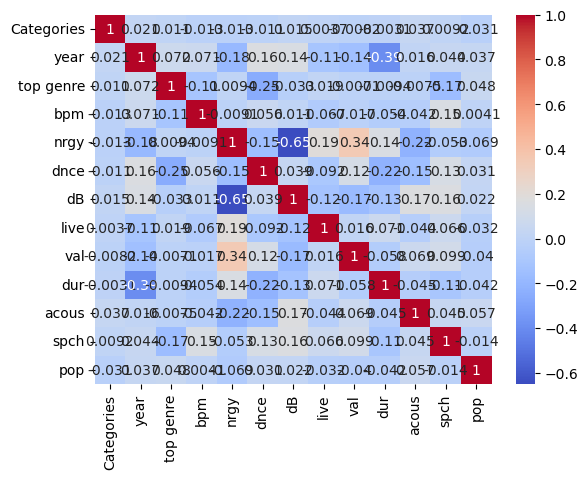

In [7]:
Future.logisticregression()

### Class StatisticalAnalysis:
#### The class is where I completed alot of statistical analysis such as finding different distributions, different plots, ectera.

In [10]:
class StatisticalAnalysis:
    def __init__(self):
        """
        Initializes a Predictions class object.
        
        Parameters
        ----------
        None
        
        """
        self.merged_df = pd.read_pickle("mergedDF.pkl")

    def distribution(self):
        """
        Prints out several plots relevant to the distribution of several variables in the dataframe

        Parameters:
        ------------
        None
        
        """
        merged_df = self.merged_df
        WorkingDataSet = merged_df[['year','top genre','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']]
        WorkingDataSet

        fig, axes = plt.subplots(nrows=1, ncols=len(WorkingDataSet.columns), figsize=(30, 5))
        for i, column in enumerate(WorkingDataSet.columns):
            sns.histplot(WorkingDataSet[column], bins=30, kde=True, ax=axes[i])
            axes[i].set_title(column)
        plt.show()
        WorkingDataSet = WorkingDataSet.drop(['top genre','year'], axis=1)
        print(WorkingDataSet.describe())
        print(WorkingDataSet.skew())
        print(WorkingDataSet.kurt())

    def QQPlot(self):
        """
        Prints out the QQPlot for the dataframe.

        Parameters:
        ------------
        None
        
        """    
        merged_df = self.merged_df
        WorkingDataSet = merged_df[['year','top genre','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']]
        WorkingDataSet = WorkingDataSet.drop(['top genre'], axis=1)
        
        fig, axes = plt.subplots(1, len(WorkingDataSet.columns), figsize=(30, 5))
        for i, column in enumerate(WorkingDataSet.columns):
            stats.probplot(WorkingDataSet[column], dist="norm", plot=axes[i])
            axes[i].set_title(f"Q-Q Plot: {column}")
        plt.show()


    def bestdistribution(self):
        """
        Return which distribution fits best for each variables

        Parameters:
        -----------
        None
        
        """
        merged_df = self.merged_df
        WorkingDataSet = merged_df[['year','top genre','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']]
        WorkingDataSet
        dist_names = ['norm', 'expon', 'lognorm', 'gamma', 'beta', 't']
        for column in WorkingDataSet.columns:
            print(f"\nFeature: {column}")
            best_dist = None
            best_p_value = 0
    
            for dist_name in dist_names:
                dist = getattr(stats, dist_name)
                params = dist.fit(WorkingDataSet[column])  # Fit distribution to data
                ks_stat, p_value = kstest(WorkingDataSet[column], dist_name, args=params)
        
                print(f"{dist_name}: p-value = {p_value:.4f}")
        
                if p_value > best_p_value:  # Keep best fit
                    best_p_value = p_value
                    best_dist = dist_name
    
            print(f"Best fit for {column}: {best_dist} (p-value = {best_p_value:.4f})")

In [11]:
StatsA = StatisticalAnalysis()

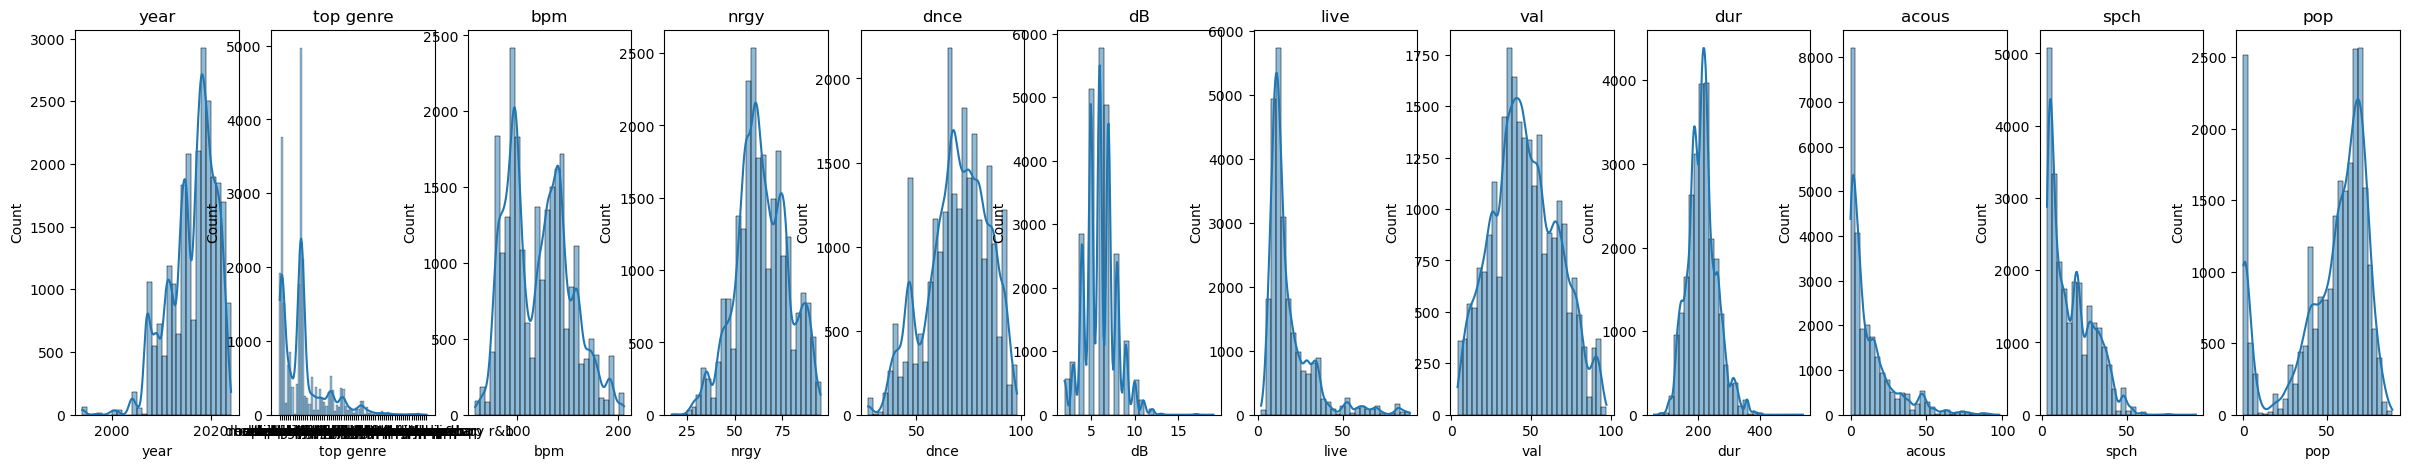

                bpm          nrgy          dnce            dB          live  \
count  24583.000000  24583.000000  24583.000000  24583.000000  24583.000000   
mean     121.163690     64.411870     69.541431      6.083350     18.443559   
std       30.766284     13.574374     14.582553      1.788397     13.865812   
min       58.000000     17.000000     27.000000      2.000000      2.000000   
25%       96.000000     56.000000     61.000000      5.000000     10.000000   
50%      120.000000     63.000000     70.000000      6.000000     13.000000   
75%      142.000000     74.000000     80.000000      7.000000     22.000000   
max      206.000000     95.000000     98.000000     19.000000     89.000000   

                val           dur         acous          spch           pop  
count  24583.000000  24583.000000  24583.000000  24583.000000  24583.000000  
mean      46.186470    213.060530     12.836798     17.714600     51.659317  
std       20.250415     46.419342     15.484386     12

In [12]:
StatsA.distribution()

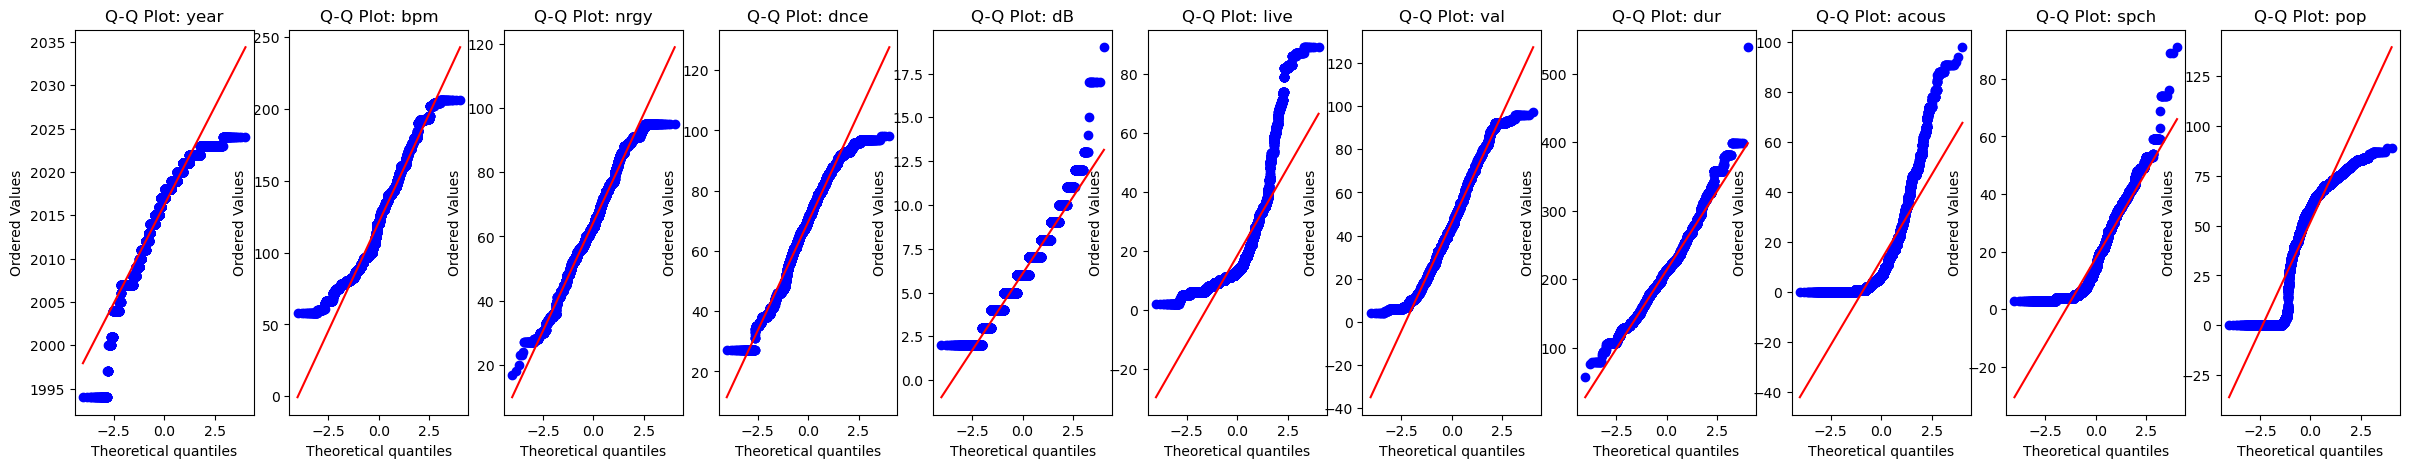

In [13]:
StatsA.QQPlot()

## NLP Section

#### https://www.mldb.org/

In [ ]:
STOP_WORDS_LIST_EN = get_stop_words("english")

### Class NLP:
#### The class is where I performed alot of Natural Language processing techniques based on song lyrics, including polarity, subjectivity, score 

In [15]:
class NLP:
    def __init__(self):
        """
        Initializes a Predictions class object.
        
        Parameters
        ----------
        None
        
        """
        self.WorkingDataFrame = pd.read_pickle('mergedDF.pkl')
        self.ClientID = #client ID
        self.ClientSecret = #ClientSecret
        self.AccessToken = #AccessToken

    def get_polarity(self,txt):
        """
            Getting Polarity using TextBlob.

            Parameters
            ----------
            txt: str
                the text of the song
        """
        polarity = TextBlob(txt).sentiment.polarity
        #print(polarity)
        
        if polarity < 0:
            return "Negative",polarity
        elif polarity == 0:
            return "Neutral", polarity
        else:
            return "Positive",polarity
        

    def get_subjectivity(self,txt):
        """
            Getting Subjectivity using Textblob.

            Parameters
            ----------
            txt: str
                the text of the song
        """
        return TextBlob(txt).sentiment.subjectivity


    def SentimentAnalysisLibrary(self,text):
        """
        prints out metrics for a given song text
    
        Parameters:
        ----------
        text:str
            the text of the song
        """
        Text = text.lower()
        Text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", Text)
        stop = stopwords.words('english')
        Text = " ".join([word for word in Text.split() if word not in (stop)])
        Length_Of_Song = len(Text)
        
        PolarityTuple = self.get_polarity(Text)
        Score = PolarityTuple[0]
        Polarity = PolarityTuple[1]
        
        Results = {"Score: ":Score, "Polarity: ":Polarity,"Subjectivity: ":self.get_subjectivity(Text),"Length Of Song: ": Length_Of_Song}
        print(Results)
        return Results

    def GeniusSentimentAnalysis(self):
        """
        This function returns plots and dataframes relevant to sentiment analysis using Genius Lyrics.

        Parameters:
        ----------
        None
        
        """
        WorkingDataFrame = self.WorkingDataFrame
        WorkingDataFrameNoDuplicates = WorkingDataFrame.drop_duplicates()
        song_counts = WorkingDataFrameNoDuplicates['title'].value_counts().head(10)
        song_counts_df = song_counts.reset_index()
        song_counts_df.columns = ['title', 'Count']
        #song_counts_df

        merged_df = pd.merge(song_counts_df,WorkingDataFrameNoDuplicates,left_on='title', right_on='title', how='inner') 
        #merged_df
        
        Top10Songs = merged_df[['title','Count','artistName']]
        Top10Songs = Top10Songs.drop_duplicates()
        Top10Songs = Top10Songs.reset_index(drop=True)
        #Top10Songs
        
        song_dict = Top10Songs.groupby('artistName')['title'].apply(list).to_dict()
        #song_dict
        del song_dict['MiloXO']

        
        genius = Genius(AccessToken)
        ListofResults = []
        NameOfSongs = []
    
        for key, value in song_dict.items():
            print(key)
            artist = genius.search_artist(key, max_songs=1, sort="title")
            print(value)
            print(len(value))
            for i in value:
                FoundSong = artist.song(i)
                FoundLyrics = FoundSong.lyrics
                SentResults = SentimentAnalysis(FoundLyrics)
                ListofResults.append(SentResults)
                NameOfSongs.append(i)
    
        #ListofResults
        #NameOfSongs
        df = pd.DataFrame(ListofResults)
        #df
        df['Name Of Songs'] = NameOfSongs
        df
        plt.hist(df['Polarity: '], bins=6, edgecolor='black', alpha=0.7)
        plt.xlabel('Polarity')
        plt.ylabel('Frequency')
        plt.title('Popular Distribution')
        plt.show()
    
        NumericalColumns = ['Polarity: ','Subjectivity: ','Length Of Song: ']
        for column in NumericalColumns:
            plt.figure(figsize=(6, 4))
            sns.histplot(df[column], bins=5, kde=True)
            plt.title(f'Histogram for {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

In [16]:
LyricsSentiment = NLP()

In [17]:
Irreplacable = '''To the left To the left

To the left
To the left

Mmmm to the left
Everything you own in the box to the left
In the closet, thats my stuff
Yes, if I bought it, then please don't touch (don't touch)

And keep talking that mess, thats fine
Could you walk and talk, at the same time?
And its my name thats on that jag
So go move your bags, let me call you a cab

Standing in the front yard, telling me
How I'm such a fool, talking 'bout
How I'll never ever find a man like you
You got me twisted

You must not know 'bout me
You must not know 'bout me
I could have another you in a minute
Matter fact, he'll be here in a minute (baby)

You must not know 'bout me
You must not know 'bout me
I can have another you by tomorrow
So don't you ever for a second get to thinkin'
You're irreplaceable

So go ahead and get gone
Call up that chick, and see if shes home
Oops I bet you thought, that I didn't know
What did you think
I was putting you out for?
Because you was untrue
Rolling her around in the car that I bought you
Baby, drop them keys
Hurry up, before your taxi leaves

Standing in the front yard, telling me
How I'm such a fool, talking 'bout
How I'll never ever find a man like you
You got me twisted

You must not know 'bout me
You must not know 'bout me
I could have another you in a minute
Matter fact, he'll be here in a minute (baby)

You must not know 'bout me
You must not know 'bout me
I'll have another you by tomorrow
So don't you ever for a second get to thinkin'
You're irreplaceable

So since I'm not your everything
How about I'll be nothing? nothing at all to you (nothing, nothing)
Baby i won't shed a tear for you (I won't shed a tear for you)
I won't lose a wink of sleep (a wink of sleep)
Cause the truth of the matter is (truth is)
Replacing you is so easy

To the left to the left
To the left to the left

Mmmmm
To the left to the left
Everything you own in the box to left

To the left to the left
Don't you ever for a second get to thinking
You're irreplaceable

You must not know 'bout me
You must not know 'bout me
I could have another you in a minute
Matter fact, he'll be here in a minute (baby)

You must not know 'bout me
You must not know 'bout me
I can have another you by tomorrow
So don't you ever for a second get to thinkin' (baby! hey yea)

You must not know 'bout me
You must not know 'bout me
I could have another you in a minute
Matter fact, he'll be here in a minute (baby)

You can pack all your bags we're finished
Cause you made your bed now lay in it
I could have another you by tomorrow
Don't you ever for a second get to thinkin You're irreplaceable
'''

In [18]:
LyricsSentiment.get_polarity(Irreplacable)

('Positive', 0.029166666666666667)

In [19]:
LyricsSentiment.SentimentAnalysisLibrary(Irreplacable)

{'Score: ': 'Negative', 'Polarity: ': -0.11964285714285715, 'Subjectivity: ': 0.22678571428571428, 'Length Of Song: ': 1689}


{'Score: ': 'Negative',
 'Polarity: ': -0.11964285714285715,
 'Subjectivity: ': 0.22678571428571428,
 'Length Of Song: ': 1689}

In [ ]:
LyricsSentiment.GeniusSentimentAnalysis()

### THE END...but actually this time